In [1]:
import torch
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.nn.functional as F

In [30]:
ligands = ["TNF", "R84", "PIC", "P3K", "FLA", "CpG", "FSL", "LPS", "UST"]
polarization = ["", "ib", "ig", "i0", "i3", "i4"]
replicas, size = 1, 1288 # unreplicated

In [3]:
from core.getdata import *
from core.dataset import *

<h3>Example of GetData</h3>

In [4]:
TNFib1 = GetData(ligands[0], polarization[1], replicas, size)
TNFib1.X.shape

(1288, 98)

<h3>Example of Dataset</h3>

In [5]:
data = Dataset(ligands, polarization, replicas, size)

In [6]:
%%time
for _ in data:
    pass

Wall time: 39 ms


In [7]:
data.data.shape

(69552, 98, 1)

In [8]:
print(type(data.data), type(data.labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [9]:
print(data.labels, data.labels.shape) #labels are multi-hot encoded

[0 0 0 ... 8 8 8] (69552,)


<h3>Initializing Dataloaders</h3>

In [10]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [11]:
X_len, test_len = int(len(data.data) * 0.75), int(len(data.data) * 0.25)
train_len, val_len = int(X_len * 0.75), int(X_len * 0.25)
print(X_len, test_len, train_len, val_len) #lengths
print(X_len + test_len, len(data.data))

52164 17388 39123 13041
69552 69552


In [12]:
training_data = data.data.reshape(data.data.shape[0], data.data.shape[1], 1) #adds extra dimension

In [13]:
data.data[1000].shape
len(data)

69552

In [14]:
dataset_X, dataset_val = torch.utils.data.random_split(data, [X_len, test_len]) # need separate data and labels for LSTM?

In [15]:
dataloader_train = torch.utils.data.DataLoader(dataset_X, batch_size=64, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=64, shuffle=True)

In [16]:
print(len(dataloader_train), len(dataloader_val), len(dataloader_train) + len(dataloader_val))
###
#data[0:10]

816 272 1088


<h3>Model Training and Evaluation</h3>

In [17]:
from core.network import *
from core.trainer import *

In [18]:
torch.cuda.is_available()

True

In [19]:
#model parameters
input_size = 1
hidden_sizes = [10, 32]
output_size = 9

#training parameters
n_epochs = 300
batch_size = 64
learning_rate = 1e-3

In [20]:
model = LSTM(input_size, hidden_sizes, output_size, num_layers=3, device="cuda:0")
model.train()

LSTM(
  (lstm): LSTM(1, 10, batch_first=True)
  (fc1): Linear(in_features=10, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=9, bias=True)
)

In [21]:
trainer = LSTMTrainer(model=model, device="cuda:0")

In [22]:
trainer.train(dataloader_train, dataloader_val, batch_size=batch_size, n_epochs=n_epochs)

  0%|▎                                                                                 | 1/300 [00:04<21:43,  4.36s/it]

Epoch 001: | Training Loss: 2.166367093429846 | Validation Loss: 2.1225028099382626


  1%|▌                                                                                 | 2/300 [00:07<19:09,  3.86s/it]

Epoch 002: | Training Loss: 2.138077751678579 | Validation Loss: 2.1640205023919834


  1%|▊                                                                                 | 3/300 [00:11<18:20,  3.71s/it]

Epoch 003: | Training Loss: 2.147739223843696 | Validation Loss: 2.1240853789974663


  1%|█                                                                                 | 4/300 [00:14<18:01,  3.65s/it]

Epoch 004: | Training Loss: 2.1027607697190023 | Validation Loss: 2.083795848138192


  2%|█▎                                                                                | 5/300 [00:18<18:09,  3.69s/it]

Epoch 005: | Training Loss: 2.074628316304263 | Validation Loss: 2.0710808148278907


  2%|█▋                                                                                | 6/300 [00:22<17:56,  3.66s/it]

Epoch 006: | Training Loss: 2.077840189139048 | Validation Loss: 2.08000247881693


  2%|█▉                                                                                | 7/300 [00:26<17:58,  3.68s/it]

Epoch 007: | Training Loss: 2.0760619251751433 | Validation Loss: 2.08128885223585


  3%|██▏                                                                               | 8/300 [00:29<17:52,  3.67s/it]

Epoch 008: | Training Loss: 2.0322812877449334 | Validation Loss: 1.993958769913982


  3%|██▍                                                                               | 9/300 [00:33<18:01,  3.72s/it]

Epoch 009: | Training Loss: 1.97633299421446 | Validation Loss: 1.9429934480611015


  3%|██▋                                                                              | 10/300 [00:37<18:05,  3.74s/it]

Epoch 010: | Training Loss: 1.9333021103167067 | Validation Loss: 1.9650511079851318


  4%|██▉                                                                              | 11/300 [00:40<17:41,  3.67s/it]

Epoch 011: | Training Loss: 1.963487146824014 | Validation Loss: 2.1364833177889095


  4%|███▏                                                                             | 12/300 [00:44<17:22,  3.62s/it]

Epoch 012: | Training Loss: 2.047413980113525 | Validation Loss: 1.9840699995265287


  4%|███▌                                                                             | 13/300 [00:47<17:19,  3.62s/it]

Epoch 013: | Training Loss: 1.944236460415756 | Validation Loss: 1.9610390325679499


  5%|███▊                                                                             | 14/300 [00:51<17:01,  3.57s/it]

Epoch 014: | Training Loss: 1.915135519031216 | Validation Loss: 1.904065942063051


  5%|████                                                                             | 15/300 [00:54<16:47,  3.54s/it]

Epoch 015: | Training Loss: 1.9018841444277297 | Validation Loss: 1.9042205508140957


  5%|████▎                                                                            | 16/300 [00:58<16:39,  3.52s/it]

Epoch 016: | Training Loss: 1.8995885811015671 | Validation Loss: 1.9114054870956085


  6%|████▌                                                                            | 17/300 [01:01<16:36,  3.52s/it]

Epoch 017: | Training Loss: 1.9133997544938444 | Validation Loss: 1.8850448885384727


  6%|████▊                                                                            | 18/300 [01:05<16:30,  3.51s/it]

Epoch 018: | Training Loss: 1.9002923982984878 | Validation Loss: 1.8914178609848022


  6%|█████▏                                                                           | 19/300 [01:08<16:23,  3.50s/it]

Epoch 019: | Training Loss: 1.885457135883032 | Validation Loss: 1.8623666548553635


  7%|█████▍                                                                           | 20/300 [01:12<16:19,  3.50s/it]

Epoch 020: | Training Loss: 1.874847540376233 | Validation Loss: 1.975485045243712


  7%|█████▋                                                                           | 21/300 [01:15<16:15,  3.50s/it]

Epoch 021: | Training Loss: 1.9049138527582674 | Validation Loss: 1.9137119462384897


  7%|█████▉                                                                           | 22/300 [01:19<16:13,  3.50s/it]

Epoch 022: | Training Loss: 1.8625748033324878 | Validation Loss: 1.977622451589388


  8%|██████▏                                                                          | 23/300 [01:22<16:09,  3.50s/it]

Epoch 023: | Training Loss: 1.884312479227197 | Validation Loss: 1.8713429666617338


  8%|██████▍                                                                          | 24/300 [01:26<16:06,  3.50s/it]

Epoch 024: | Training Loss: 1.8488170146649958 | Validation Loss: 1.8874569618526627


  8%|██████▊                                                                          | 25/300 [01:29<16:12,  3.54s/it]

Epoch 025: | Training Loss: 1.8403230629423086 | Validation Loss: 1.9530277782503296


  9%|███████                                                                          | 26/300 [01:33<16:19,  3.58s/it]

Epoch 026: | Training Loss: 1.8351582345717095 | Validation Loss: 1.8406839379492927


  9%|███████▎                                                                         | 27/300 [01:37<16:20,  3.59s/it]

Epoch 027: | Training Loss: 1.8402302599712914 | Validation Loss: 1.8304703445995556


  9%|███████▌                                                                         | 28/300 [01:40<16:19,  3.60s/it]

Epoch 028: | Training Loss: 1.8139305628982245 | Validation Loss: 1.8074153569691322


 10%|███████▊                                                                         | 29/300 [01:44<16:17,  3.61s/it]

Epoch 029: | Training Loss: 1.7949647761735261 | Validation Loss: 1.7861730149563622


 10%|████████                                                                         | 30/300 [01:48<16:16,  3.62s/it]

Epoch 030: | Training Loss: 1.7848127758970447 | Validation Loss: 1.789881772854749


 10%|████████▎                                                                        | 31/300 [01:51<16:12,  3.62s/it]

Epoch 031: | Training Loss: 1.7774980925754005 | Validation Loss: 1.7727003838209545


 11%|████████▋                                                                        | 32/300 [01:55<16:07,  3.61s/it]

Epoch 032: | Training Loss: 1.7813243248006876 | Validation Loss: 1.7955109498956625


 11%|████████▉                                                                        | 33/300 [01:58<16:05,  3.62s/it]

Epoch 033: | Training Loss: 1.7691377034666491 | Validation Loss: 1.7851134871735292


 11%|█████████▏                                                                       | 34/300 [02:02<16:06,  3.63s/it]

Epoch 034: | Training Loss: 1.7699837810268588 | Validation Loss: 1.7904184329159119


 12%|█████████▍                                                                       | 35/300 [02:06<16:05,  3.64s/it]

Epoch 035: | Training Loss: 1.7629378464292078 | Validation Loss: 1.7655959129333496


 12%|█████████▋                                                                       | 36/300 [02:09<16:00,  3.64s/it]

Epoch 036: | Training Loss: 1.759510996879316 | Validation Loss: 1.7674473173478071


 12%|█████████▉                                                                       | 37/300 [02:13<15:54,  3.63s/it]

Epoch 037: | Training Loss: 1.7779087238744193 | Validation Loss: 1.80202438463183


 13%|██████████▎                                                                      | 38/300 [02:17<15:48,  3.62s/it]

Epoch 038: | Training Loss: 1.778383982239985 | Validation Loss: 1.7713827376856524


 13%|██████████▌                                                                      | 39/300 [02:20<15:45,  3.62s/it]

Epoch 039: | Training Loss: 1.7574550769492692 | Validation Loss: 1.761241301894188


 13%|██████████▊                                                                      | 40/300 [02:24<15:40,  3.62s/it]

Epoch 040: | Training Loss: 1.7483965715064722 | Validation Loss: 1.7528338432312012


 14%|███████████                                                                      | 41/300 [02:27<15:36,  3.62s/it]

Epoch 041: | Training Loss: 1.928815402528819 | Validation Loss: 2.059818426037536


 14%|███████████▎                                                                     | 42/300 [02:31<15:37,  3.63s/it]

Epoch 042: | Training Loss: 2.0030806916309336 | Validation Loss: 1.953297772390001


 14%|███████████▌                                                                     | 43/300 [02:35<15:35,  3.64s/it]

Epoch 043: | Training Loss: 1.9301177565665806 | Validation Loss: 1.8917006078888388


 15%|███████████▉                                                                     | 44/300 [02:38<15:29,  3.63s/it]

Epoch 044: | Training Loss: 1.8461203364764942 | Validation Loss: 1.791071891784668


 15%|████████████▏                                                                    | 45/300 [02:42<15:26,  3.63s/it]

Epoch 045: | Training Loss: 1.7762673375945466 | Validation Loss: 1.769397097913658


 15%|████████████▍                                                                    | 46/300 [02:46<15:21,  3.63s/it]

Epoch 046: | Training Loss: 1.763835016272816 | Validation Loss: 1.7672080200384646


 16%|████████████▋                                                                    | 47/300 [02:49<15:15,  3.62s/it]

Epoch 047: | Training Loss: 1.7604132106198984 | Validation Loss: 1.7648163665743435


 16%|████████████▉                                                                    | 48/300 [02:53<15:12,  3.62s/it]

Epoch 048: | Training Loss: 1.7588200526786786 | Validation Loss: 1.7611972527468907


 16%|█████████████▏                                                                   | 49/300 [02:57<15:15,  3.65s/it]

Epoch 049: | Training Loss: 1.7493968778381161 | Validation Loss: 1.7678808561142754


 17%|█████████████▌                                                                   | 50/300 [03:00<15:18,  3.68s/it]

Epoch 050: | Training Loss: 1.7442722773435069 | Validation Loss: 1.774642428054529


 17%|█████████████▊                                                                   | 51/300 [03:04<15:17,  3.69s/it]

Epoch 051: | Training Loss: 1.7401272019042688 | Validation Loss: 1.738100746536956


 17%|██████████████                                                                   | 52/300 [03:08<15:14,  3.69s/it]

Epoch 052: | Training Loss: 1.7442391723686574 | Validation Loss: 1.7385890426881172


 18%|██████████████▎                                                                  | 53/300 [03:11<15:06,  3.67s/it]

Epoch 053: | Training Loss: 1.7397076155917317 | Validation Loss: 1.7966607274378048


 18%|██████████████▌                                                                  | 54/300 [03:15<14:59,  3.66s/it]

Epoch 054: | Training Loss: 1.7328107811364473 | Validation Loss: 1.7426044734961845


 18%|██████████████▊                                                                  | 55/300 [03:19<14:54,  3.65s/it]

Epoch 055: | Training Loss: 1.7328312134041506 | Validation Loss: 1.7398915733484661


 19%|███████████████                                                                  | 56/300 [03:22<14:48,  3.64s/it]

Epoch 056: | Training Loss: 1.7261488119176789 | Validation Loss: 1.7219846958623213


 19%|███████████████▍                                                                 | 57/300 [03:26<14:42,  3.63s/it]

Epoch 057: | Training Loss: 1.7269320447070926 | Validation Loss: 1.726930790087756


 19%|███████████████▋                                                                 | 58/300 [03:29<14:37,  3.63s/it]

Epoch 058: | Training Loss: 1.7240968372891932 | Validation Loss: 1.7430186981663984


 20%|███████████████▉                                                                 | 59/300 [03:33<14:36,  3.64s/it]

Epoch 059: | Training Loss: 1.7214403511116319 | Validation Loss: 1.7235940155737541


 20%|████████████████▏                                                                | 60/300 [03:37<14:34,  3.64s/it]

Epoch 060: | Training Loss: 1.722577139589132 | Validation Loss: 1.7212468262980967


 20%|████████████████▍                                                                | 61/300 [03:40<14:28,  3.63s/it]

Epoch 061: | Training Loss: 1.7200203143498476 | Validation Loss: 1.7207793676677872


 21%|████████████████▋                                                                | 62/300 [03:44<14:24,  3.63s/it]

Epoch 062: | Training Loss: 1.7301058314886748 | Validation Loss: 1.7363798026652897


 21%|█████████████████                                                                | 63/300 [03:48<14:20,  3.63s/it]

Epoch 063: | Training Loss: 1.738020754474051 | Validation Loss: 1.7499900442712448


 21%|█████████████████▎                                                               | 64/300 [03:51<14:15,  3.63s/it]

Epoch 064: | Training Loss: 1.7194979144077676 | Validation Loss: 1.922548465869006


 22%|█████████████████▌                                                               | 65/300 [03:55<14:10,  3.62s/it]

Epoch 065: | Training Loss: 1.728369477332807 | Validation Loss: 1.710861157406779


 22%|█████████████████▊                                                               | 66/300 [03:59<14:07,  3.62s/it]

Epoch 066: | Training Loss: 1.7083927588719947 | Validation Loss: 1.7336167938569014


 22%|██████████████████                                                               | 67/300 [04:02<14:02,  3.61s/it]

Epoch 067: | Training Loss: 1.7043455292781193 | Validation Loss: 1.718979058020255


 23%|██████████████████▎                                                              | 68/300 [04:06<14:05,  3.65s/it]

Epoch 068: | Training Loss: 1.6994302789954578 | Validation Loss: 1.7059244627461714


 23%|██████████████████▋                                                              | 69/300 [04:10<14:04,  3.66s/it]

Epoch 069: | Training Loss: 1.7173778657235352 | Validation Loss: 1.7419668256359941


 23%|██████████████████▉                                                              | 70/300 [04:13<13:59,  3.65s/it]

Epoch 070: | Training Loss: 1.7023390769666316 | Validation Loss: 1.7033630486796885


 24%|███████████████████▏                                                             | 71/300 [04:17<13:54,  3.64s/it]

Epoch 071: | Training Loss: 1.6956131218695174 | Validation Loss: 1.7193990560138928


 24%|███████████████████▍                                                             | 72/300 [04:20<13:52,  3.65s/it]

Epoch 072: | Training Loss: 1.6924950199968674 | Validation Loss: 1.69661576651475


 24%|███████████████████▋                                                             | 73/300 [04:24<13:54,  3.68s/it]

Epoch 073: | Training Loss: 1.6953991208882893 | Validation Loss: 1.695281656787676


 25%|███████████████████▉                                                             | 74/300 [04:28<13:47,  3.66s/it]

Epoch 074: | Training Loss: 1.6901728363305915 | Validation Loss: 1.6967814547174118


 25%|████████████████████▎                                                            | 75/300 [04:32<13:48,  3.68s/it]

Epoch 075: | Training Loss: 1.714771762928542 | Validation Loss: 1.7235024922034319


 25%|████████████████████▌                                                            | 76/300 [04:35<13:52,  3.72s/it]

Epoch 076: | Training Loss: 1.7027688813852329 | Validation Loss: 1.6966856257880436


 26%|████████████████████▊                                                            | 77/300 [04:39<13:47,  3.71s/it]

Epoch 077: | Training Loss: 1.687680851156805 | Validation Loss: 1.6895393067423035


 26%|█████████████████████                                                            | 78/300 [04:43<13:39,  3.69s/it]

Epoch 078: | Training Loss: 1.6832561582034709 | Validation Loss: 1.6885830299819218


 26%|█████████████████████▎                                                           | 79/300 [04:46<13:38,  3.70s/it]

Epoch 079: | Training Loss: 1.6823406809685277 | Validation Loss: 1.7802397126660627


 27%|█████████████████████▌                                                           | 80/300 [04:50<13:30,  3.69s/it]

Epoch 080: | Training Loss: 1.6919715010067995 | Validation Loss: 1.6900046502842623


 27%|█████████████████████▊                                                           | 81/300 [04:54<13:24,  3.68s/it]

Epoch 081: | Training Loss: 1.6792761321161307 | Validation Loss: 1.6998750606880468


 27%|██████████████████████▏                                                          | 82/300 [04:57<13:21,  3.68s/it]

Epoch 082: | Training Loss: 1.673774922303125 | Validation Loss: 1.6890966826502014


 28%|██████████████████████▍                                                          | 83/300 [05:01<13:15,  3.67s/it]

Epoch 083: | Training Loss: 1.6723316287000973 | Validation Loss: 1.6787365696886007


 28%|██████████████████████▋                                                          | 84/300 [05:05<13:14,  3.68s/it]

Epoch 084: | Training Loss: 1.6692656668670036 | Validation Loss: 1.678505948799498


 28%|██████████████████████▉                                                          | 85/300 [05:08<13:12,  3.69s/it]

Epoch 085: | Training Loss: 1.6656956437463855 | Validation Loss: 1.6828789877540924


 29%|███████████████████████▏                                                         | 86/300 [05:12<13:12,  3.70s/it]

Epoch 086: | Training Loss: 1.6609432245878613 | Validation Loss: 1.672050054459011


 29%|███████████████████████▍                                                         | 87/300 [05:16<13:05,  3.69s/it]

Epoch 087: | Training Loss: 1.6607036987940471 | Validation Loss: 1.6590835868435747


 29%|███████████████████████▊                                                         | 88/300 [05:20<13:01,  3.69s/it]

Epoch 088: | Training Loss: 1.65439290071235 | Validation Loss: 1.6590018285547985


 30%|████████████████████████                                                         | 89/300 [05:23<12:53,  3.67s/it]

Epoch 089: | Training Loss: 1.6524133897003006 | Validation Loss: 1.6578663982012694


 30%|████████████████████████▎                                                        | 90/300 [05:27<12:47,  3.65s/it]

Epoch 090: | Training Loss: 1.6458735651537484 | Validation Loss: 1.6559461250024683


 30%|████████████████████████▌                                                        | 91/300 [05:30<12:40,  3.64s/it]

Epoch 091: | Training Loss: 1.6425858746264494 | Validation Loss: 1.6458336987039621


 31%|████████████████████████▊                                                        | 92/300 [05:34<12:35,  3.63s/it]

Epoch 092: | Training Loss: 1.6422853326680613 | Validation Loss: 1.6476458560894518


 31%|█████████████████████████                                                        | 93/300 [05:38<12:35,  3.65s/it]

Epoch 093: | Training Loss: 1.6372737856764419 | Validation Loss: 1.6377136606503935


 31%|█████████████████████████▍                                                       | 94/300 [05:41<12:33,  3.66s/it]

Epoch 094: | Training Loss: 1.6341817545540192 | Validation Loss: 1.6373432567890953


 32%|█████████████████████████▋                                                       | 95/300 [05:45<12:28,  3.65s/it]

Epoch 095: | Training Loss: 1.6332817327450304 | Validation Loss: 1.6336723040131962


 32%|█████████████████████████▉                                                       | 96/300 [05:49<12:24,  3.65s/it]

Epoch 096: | Training Loss: 1.6291882836935567 | Validation Loss: 1.6336718617993242


 32%|██████████████████████████▏                                                      | 97/300 [05:52<12:19,  3.64s/it]

Epoch 097: | Training Loss: 1.626056121260512 | Validation Loss: 1.6539484542958878


 33%|██████████████████████████▍                                                      | 98/300 [05:56<12:15,  3.64s/it]

Epoch 098: | Training Loss: 1.6235668917789179 | Validation Loss: 1.628294921534903


 33%|██████████████████████████▋                                                      | 99/300 [06:00<12:09,  3.63s/it]

Epoch 099: | Training Loss: 1.622617274814961 | Validation Loss: 1.6269353505443125


 33%|██████████████████████████▋                                                     | 100/300 [06:03<12:04,  3.62s/it]

Epoch 100: | Training Loss: 1.619667074843949 | Validation Loss: 1.6314799207098343


 34%|██████████████████████████▉                                                     | 101/300 [06:07<12:00,  3.62s/it]

Epoch 101: | Training Loss: 1.6189743782959731 | Validation Loss: 1.6331312652019894


 34%|███████████████████████████▏                                                    | 102/300 [06:10<11:59,  3.63s/it]

Epoch 102: | Training Loss: 1.6168091097006612 | Validation Loss: 1.6780564329203438


 34%|███████████████████████████▍                                                    | 103/300 [06:14<11:56,  3.64s/it]

Epoch 103: | Training Loss: 1.6140047640484922 | Validation Loss: 1.6207020168795305


 35%|███████████████████████████▋                                                    | 104/300 [06:18<11:58,  3.67s/it]

Epoch 104: | Training Loss: 1.6105955127699703 | Validation Loss: 1.6227201972814167


 35%|████████████████████████████                                                    | 105/300 [06:22<11:59,  3.69s/it]

Epoch 105: | Training Loss: 1.6132454449931781 | Validation Loss: 1.616612261709045


 35%|████████████████████████████▎                                                   | 106/300 [06:25<11:52,  3.67s/it]

Epoch 106: | Training Loss: 1.6079344191387588 | Validation Loss: 1.6102854600724053


 36%|████████████████████████████▌                                                   | 107/300 [06:29<11:45,  3.65s/it]

Epoch 107: | Training Loss: 1.607085779163183 | Validation Loss: 1.6111839737962275


 36%|████████████████████████████▊                                                   | 108/300 [06:32<11:39,  3.64s/it]

Epoch 108: | Training Loss: 1.605796449324664 | Validation Loss: 1.6113484834923464


 36%|█████████████████████████████                                                   | 109/300 [06:36<11:34,  3.64s/it]

Epoch 109: | Training Loss: 1.6037153981479944 | Validation Loss: 1.6015135369756643


 37%|█████████████████████████████▎                                                  | 110/300 [06:40<11:32,  3.64s/it]

Epoch 110: | Training Loss: 1.5994145875321883 | Validation Loss: 1.6011301204562187


 37%|█████████████████████████████▌                                                  | 111/300 [06:43<11:30,  3.65s/it]

Epoch 111: | Training Loss: 1.5985942617350934 | Validation Loss: 1.6035106033086777


 37%|█████████████████████████████▊                                                  | 112/300 [06:47<11:25,  3.65s/it]

Epoch 112: | Training Loss: 1.5959210446944423 | Validation Loss: 1.5993422971052282


 38%|██████████████████████████████▏                                                 | 113/300 [06:51<11:20,  3.64s/it]

Epoch 113: | Training Loss: 1.5947169264157612 | Validation Loss: 1.5948924260104405


 38%|██████████████████████████████▍                                                 | 114/300 [06:54<11:15,  3.63s/it]

Epoch 114: | Training Loss: 1.5923030177752178 | Validation Loss: 1.5912406010662807


 38%|██████████████████████████████▋                                                 | 115/300 [06:58<11:10,  3.63s/it]

Epoch 115: | Training Loss: 1.5896319931044298 | Validation Loss: 1.6032161353265537


 39%|██████████████████████████████▉                                                 | 116/300 [07:01<11:06,  3.62s/it]

Epoch 116: | Training Loss: 1.5867103152707511 | Validation Loss: 1.592913424705758


 39%|███████████████████████████████▏                                                | 117/300 [07:05<11:02,  3.62s/it]

Epoch 117: | Training Loss: 1.5869739696967835 | Validation Loss: 1.5892076842925127


 39%|███████████████████████████████▍                                                | 118/300 [07:09<10:58,  3.62s/it]

Epoch 118: | Training Loss: 1.5818548622157644 | Validation Loss: 1.6166500567513353


 40%|███████████████████████████████▋                                                | 119/300 [07:12<10:58,  3.64s/it]

Epoch 119: | Training Loss: 1.5842861178166725 | Validation Loss: 1.6107758217874695


 40%|████████████████████████████████                                                | 120/300 [07:16<10:56,  3.65s/it]

Epoch 120: | Training Loss: 1.5793770634952713 | Validation Loss: 1.5920166456524063


 40%|████████████████████████████████▎                                               | 121/300 [07:20<10:54,  3.66s/it]

Epoch 121: | Training Loss: 1.578612351826593 | Validation Loss: 1.5868915214258081


 41%|████████████████████████████████▌                                               | 122/300 [07:23<10:54,  3.68s/it]

Epoch 122: | Training Loss: 1.5774987567873562 | Validation Loss: 1.5823027202311684


 41%|████████████████████████████████▊                                               | 123/300 [07:27<10:51,  3.68s/it]

Epoch 123: | Training Loss: 1.5770433048407237 | Validation Loss: 1.581179006573032


 41%|█████████████████████████████████                                               | 124/300 [07:31<10:52,  3.71s/it]

Epoch 124: | Training Loss: 1.5722602890694843 | Validation Loss: 1.5855025486911045


 42%|█████████████████████████████████▎                                              | 125/300 [07:35<10:49,  3.71s/it]

Epoch 125: | Training Loss: 1.5715154609551616 | Validation Loss: 1.5755913156796904


 42%|█████████████████████████████████▌                                              | 126/300 [07:38<10:43,  3.70s/it]

Epoch 126: | Training Loss: 1.5712612633611642 | Validation Loss: 1.5982008830589407


 42%|█████████████████████████████████▊                                              | 127/300 [07:42<10:39,  3.70s/it]

Epoch 127: | Training Loss: 1.57125168702766 | Validation Loss: 1.5769110760268044


 43%|██████████████████████████████████▏                                             | 128/300 [07:46<10:33,  3.68s/it]

Epoch 128: | Training Loss: 1.5699914045193617 | Validation Loss: 1.5751178014804335


 43%|██████████████████████████████████▍                                             | 129/300 [07:49<10:27,  3.67s/it]

Epoch 129: | Training Loss: 1.5678330627726573 | Validation Loss: 1.5724789938505959


 43%|██████████████████████████████████▋                                             | 130/300 [07:53<10:23,  3.67s/it]

Epoch 130: | Training Loss: 1.567208859558199 | Validation Loss: 1.574904558413169


 44%|██████████████████████████████████▉                                             | 131/300 [07:57<10:17,  3.65s/it]

Epoch 131: | Training Loss: 1.5681434466558344 | Validation Loss: 1.5743696146151598


 44%|███████████████████████████████████▏                                            | 132/300 [08:00<10:10,  3.64s/it]

Epoch 132: | Training Loss: 1.564079969829204 | Validation Loss: 1.5843617819687899


 44%|███████████████████████████████████▍                                            | 133/300 [08:04<10:05,  3.63s/it]

Epoch 133: | Training Loss: 1.5639385990068024 | Validation Loss: 1.5669807493686676


 45%|███████████████████████████████████▋                                            | 134/300 [08:07<10:01,  3.62s/it]

Epoch 134: | Training Loss: 1.5635727040615737 | Validation Loss: 1.568998643580605


 45%|████████████████████████████████████                                            | 135/300 [08:11<10:02,  3.65s/it]

Epoch 135: | Training Loss: 1.5614127070442134 | Validation Loss: 1.5739923386889345


 45%|████████████████████████████████████▎                                           | 136/300 [08:15<10:15,  3.75s/it]

Epoch 136: | Training Loss: 1.5601624370205636 | Validation Loss: 1.5891245765721096


 46%|████████████████████████████████████▌                                           | 137/300 [08:19<10:10,  3.75s/it]

Epoch 137: | Training Loss: 1.559794435021924 | Validation Loss: 1.5746591503129286


 46%|████████████████████████████████████▊                                           | 138/300 [08:22<10:01,  3.71s/it]

Epoch 138: | Training Loss: 1.5574194715887892 | Validation Loss: 1.5706356413224165


 46%|█████████████████████████████████████                                           | 139/300 [08:26<09:53,  3.69s/it]

Epoch 139: | Training Loss: 1.5575780921122606 | Validation Loss: 1.5679181787897558


 47%|█████████████████████████████████████▎                                          | 140/300 [08:30<09:46,  3.67s/it]

Epoch 140: | Training Loss: 1.5563797928831156 | Validation Loss: 1.5663690492510796


 47%|█████████████████████████████████████▌                                          | 141/300 [08:33<09:40,  3.65s/it]

Epoch 141: | Training Loss: 1.5559638459600655 | Validation Loss: 1.5636662411339142


 47%|█████████████████████████████████████▊                                          | 142/300 [08:37<09:37,  3.65s/it]

Epoch 142: | Training Loss: 1.5541313245308166 | Validation Loss: 1.56733057253501


 48%|██████████████████████████████████████▏                                         | 143/300 [08:41<09:31,  3.64s/it]

Epoch 143: | Training Loss: 1.5529657744017302 | Validation Loss: 1.5569617551039248


 48%|██████████████████████████████████████▍                                         | 144/300 [08:44<09:30,  3.66s/it]

Epoch 144: | Training Loss: 1.5526563274655856 | Validation Loss: 1.5651380770346697


 48%|██████████████████████████████████████▋                                         | 145/300 [08:48<09:28,  3.67s/it]

Epoch 145: | Training Loss: 1.5509914383292198 | Validation Loss: 1.5631286804290379


 49%|██████████████████████████████████████▉                                         | 146/300 [08:52<09:23,  3.66s/it]

Epoch 146: | Training Loss: 1.5505423138246817 | Validation Loss: 1.5581911355257034


 49%|███████████████████████████████████████▏                                        | 147/300 [08:55<09:18,  3.65s/it]

Epoch 147: | Training Loss: 1.5489272387588726 | Validation Loss: 1.562079990611357


 49%|███████████████████████████████████████▍                                        | 148/300 [08:59<09:13,  3.64s/it]

Epoch 148: | Training Loss: 1.548987315565932 | Validation Loss: 1.5526013356797836


 50%|███████████████████████████████████████▋                                        | 149/300 [09:02<09:08,  3.63s/it]

Epoch 149: | Training Loss: 1.546672709286213 | Validation Loss: 1.5551828040796167


 50%|████████████████████████████████████████                                        | 150/300 [09:06<09:03,  3.63s/it]

Epoch 150: | Training Loss: 1.5487191742833923 | Validation Loss: 1.55297504496925


 50%|████████████████████████████████████████▎                                       | 151/300 [09:10<09:00,  3.63s/it]

Epoch 151: | Training Loss: 1.5459183230996132 | Validation Loss: 1.5828332348781473


 51%|████████████████████████████████████████▌                                       | 152/300 [09:13<08:56,  3.63s/it]

Epoch 152: | Training Loss: 1.5457409966517897 | Validation Loss: 1.5531539754832493


 51%|████████████████████████████████████████▊                                       | 153/300 [09:17<08:56,  3.65s/it]

Epoch 153: | Training Loss: 1.5448593934084855 | Validation Loss: 1.5492505172596258


 51%|█████████████████████████████████████████                                       | 154/300 [09:21<08:55,  3.66s/it]

Epoch 154: | Training Loss: 1.5425026704575502 | Validation Loss: 1.5773855947396334


 52%|█████████████████████████████████████████▎                                      | 155/300 [09:24<08:50,  3.66s/it]

Epoch 155: | Training Loss: 1.5409610424848164 | Validation Loss: 1.5504035818226196


 52%|█████████████████████████████████████████▌                                      | 156/300 [09:28<08:46,  3.66s/it]

Epoch 156: | Training Loss: 1.5396615078344065 | Validation Loss: 1.5467338040471077


 52%|█████████████████████████████████████████▊                                      | 157/300 [09:32<08:44,  3.67s/it]

Epoch 157: | Training Loss: 1.5400347674594206 | Validation Loss: 1.5472646381925135


 53%|██████████████████████████████████████████▏                                     | 158/300 [09:35<08:38,  3.65s/it]

Epoch 158: | Training Loss: 1.5381476474451083 | Validation Loss: 1.5558597270180197


 53%|██████████████████████████████████████████▍                                     | 159/300 [09:39<08:34,  3.65s/it]

Epoch 159: | Training Loss: 1.5408541225627357 | Validation Loss: 1.558099122608409


 53%|██████████████████████████████████████████▋                                     | 160/300 [09:43<08:28,  3.63s/it]

Epoch 160: | Training Loss: 1.5386806175697083 | Validation Loss: 1.5421294035280453


 54%|██████████████████████████████████████████▉                                     | 161/300 [09:46<08:27,  3.65s/it]

Epoch 161: | Training Loss: 1.537112168821634 | Validation Loss: 1.5461809714050854


 54%|███████████████████████████████████████████▏                                    | 162/300 [09:50<08:23,  3.65s/it]

Epoch 162: | Training Loss: 1.534898449977239 | Validation Loss: 1.5414051571313072


 54%|███████████████████████████████████████████▍                                    | 163/300 [09:54<08:18,  3.64s/it]

Epoch 163: | Training Loss: 1.5348940712271952 | Validation Loss: 1.54516132482711


 55%|███████████████████████████████████████████▋                                    | 164/300 [09:57<08:14,  3.63s/it]

Epoch 164: | Training Loss: 1.534042639256108 | Validation Loss: 1.5428379958166796


 55%|████████████████████████████████████████████                                    | 165/300 [10:01<08:10,  3.63s/it]

Epoch 165: | Training Loss: 1.5334069311034446 | Validation Loss: 1.5365355220787666


 55%|████████████████████████████████████████████▎                                   | 166/300 [10:04<08:06,  3.63s/it]

Epoch 166: | Training Loss: 1.532539561975236 | Validation Loss: 1.538070273311699


 56%|████████████████████████████████████████████▌                                   | 167/300 [10:08<08:02,  3.63s/it]

Epoch 167: | Training Loss: 1.5328454370884335 | Validation Loss: 1.5427599233739517


 56%|████████████████████████████████████████████▊                                   | 168/300 [10:12<07:58,  3.62s/it]

Epoch 168: | Training Loss: 1.531343902881239 | Validation Loss: 1.5375474967500742


 56%|█████████████████████████████████████████████                                   | 169/300 [10:15<07:55,  3.63s/it]

Epoch 169: | Training Loss: 1.5336875465570712 | Validation Loss: 1.5370402914636276


 57%|█████████████████████████████████████████████▎                                  | 170/300 [10:19<08:01,  3.70s/it]

Epoch 170: | Training Loss: 1.5276984348162717 | Validation Loss: 1.5421416649923605


 57%|█████████████████████████████████████████████▌                                  | 171/300 [10:23<07:57,  3.70s/it]

Epoch 171: | Training Loss: 1.529397676242333 | Validation Loss: 1.5471292664023006


 57%|█████████████████████████████████████████████▊                                  | 172/300 [10:26<07:51,  3.68s/it]

Epoch 172: | Training Loss: 1.5324837767026003 | Validation Loss: 1.5312533496933824


 58%|██████████████████████████████████████████████▏                                 | 173/300 [10:30<07:47,  3.68s/it]

Epoch 173: | Training Loss: 1.5280612670615608 | Validation Loss: 1.540011827560032


 58%|██████████████████████████████████████████████▍                                 | 174/300 [10:34<07:40,  3.66s/it]

Epoch 174: | Training Loss: 1.5298688049409903 | Validation Loss: 1.5415841700399624


 58%|██████████████████████████████████████████████▋                                 | 175/300 [10:37<07:35,  3.65s/it]

Epoch 175: | Training Loss: 1.5289324862407703 | Validation Loss: 1.5411634567905874


 59%|██████████████████████████████████████████████▉                                 | 176/300 [10:41<07:31,  3.64s/it]

Epoch 176: | Training Loss: 1.5279446917713857 | Validation Loss: 1.5301158314242083


 59%|███████████████████████████████████████████████▏                                | 177/300 [10:45<07:26,  3.63s/it]

Epoch 177: | Training Loss: 1.5260579227378555 | Validation Loss: 1.5418637855088009


 59%|███████████████████████████████████████████████▍                                | 178/300 [10:48<07:24,  3.64s/it]

Epoch 178: | Training Loss: 1.5284291717643832 | Validation Loss: 1.5276956006008036


 60%|███████████████████████████████████████████████▋                                | 179/300 [10:52<07:21,  3.65s/it]

Epoch 179: | Training Loss: 1.5262303847600431 | Validation Loss: 1.540946058490697


 60%|████████████████████████████████████████████████                                | 180/300 [10:56<07:17,  3.65s/it]

Epoch 180: | Training Loss: 1.5251943328801323 | Validation Loss: 1.5332434387768017


 60%|████████████████████████████████████████████████▎                               | 181/300 [10:59<07:15,  3.66s/it]

Epoch 181: | Training Loss: 1.5224164509597946 | Validation Loss: 1.5444336204844362


 61%|████████████████████████████████████████████████▌                               | 182/300 [11:03<07:12,  3.67s/it]

Epoch 182: | Training Loss: 1.523733509814038 | Validation Loss: 1.540246196091175


 61%|████████████████████████████████████████████████▊                               | 183/300 [11:07<07:14,  3.71s/it]

Epoch 183: | Training Loss: 1.5227618675459833 | Validation Loss: 1.5283051220809711


 61%|█████████████████████████████████████████████████                               | 184/300 [11:11<07:15,  3.76s/it]

Epoch 184: | Training Loss: 1.5217246613373943 | Validation Loss: 1.527584568980862


 62%|█████████████████████████████████████████████████▎                              | 185/300 [11:14<07:14,  3.78s/it]

Epoch 185: | Training Loss: 1.5206833641026534 | Validation Loss: 1.532895124572165


 62%|█████████████████████████████████████████████████▌                              | 186/300 [11:19<07:21,  3.87s/it]

Epoch 186: | Training Loss: 1.522218906850207 | Validation Loss: 1.523233042920337


 62%|█████████████████████████████████████████████████▊                              | 187/300 [11:22<07:19,  3.89s/it]

Epoch 187: | Training Loss: 1.530234309534232 | Validation Loss: 1.5378163071239697


 63%|██████████████████████████████████████████████████▏                             | 188/300 [11:26<07:09,  3.83s/it]

Epoch 188: | Training Loss: 1.5223503077731413 | Validation Loss: 1.5261858969050295


 63%|██████████████████████████████████████████████████▍                             | 189/300 [11:30<06:59,  3.78s/it]

Epoch 189: | Training Loss: 1.52153426978518 | Validation Loss: 1.5249536054975845


 63%|██████████████████████████████████████████████████▋                             | 190/300 [11:34<06:55,  3.78s/it]

Epoch 190: | Training Loss: 1.5192972512221803 | Validation Loss: 1.537415531628272


 64%|██████████████████████████████████████████████████▉                             | 191/300 [11:37<06:53,  3.79s/it]

Epoch 191: | Training Loss: 1.518189150913089 | Validation Loss: 1.5278300805126919


 64%|███████████████████████████████████████████████████▏                            | 192/300 [11:41<06:46,  3.76s/it]

Epoch 192: | Training Loss: 1.5178146037254847 | Validation Loss: 1.5287955271847107


 64%|███████████████████████████████████████████████████▍                            | 193/300 [11:45<06:44,  3.78s/it]

Epoch 193: | Training Loss: 1.518641051124124 | Validation Loss: 1.5287998976076351


 65%|███████████████████████████████████████████████████▋                            | 194/300 [11:49<06:44,  3.82s/it]

Epoch 194: | Training Loss: 1.5193881535646963 | Validation Loss: 1.5267635526902534


 65%|████████████████████████████████████████████████████                            | 195/300 [11:53<06:44,  3.85s/it]

Epoch 195: | Training Loss: 1.5188599630605941 | Validation Loss: 1.5196832707699608


 65%|████████████████████████████████████████████████████▎                           | 196/300 [11:57<06:38,  3.84s/it]

Epoch 196: | Training Loss: 1.5156268599424876 | Validation Loss: 1.5210994065684431


 66%|████████████████████████████████████████████████████▌                           | 197/300 [12:00<06:30,  3.79s/it]

Epoch 197: | Training Loss: 1.5157282523372595 | Validation Loss: 1.53476710836677


 66%|████████████████████████████████████████████████████▊                           | 198/300 [12:04<06:21,  3.74s/it]

Epoch 198: | Training Loss: 1.516560062035626 | Validation Loss: 1.5264973798218895


 66%|█████████████████████████████████████████████████████                           | 199/300 [12:07<06:14,  3.70s/it]

Epoch 199: | Training Loss: 1.515570984313301 | Validation Loss: 1.5229250087457544


 67%|█████████████████████████████████████████████████████▎                          | 200/300 [12:11<06:08,  3.68s/it]

Epoch 200: | Training Loss: 1.5155325096611882 | Validation Loss: 1.5201627160696423


 67%|█████████████████████████████████████████████████████▌                          | 201/300 [12:15<06:02,  3.66s/it]

Epoch 201: | Training Loss: 1.515739879771775 | Validation Loss: 1.5242971059154062


 67%|█████████████████████████████████████████████████████▊                          | 202/300 [12:18<05:58,  3.66s/it]

Epoch 202: | Training Loss: 1.513963515121563 | Validation Loss: 1.5353253032354748


 68%|██████████████████████████████████████████████████████▏                         | 203/300 [12:22<05:56,  3.67s/it]

Epoch 203: | Training Loss: 1.5145918899307065 | Validation Loss: 1.5226416245979422


 68%|██████████████████████████████████████████████████████▍                         | 204/300 [12:26<05:53,  3.68s/it]

Epoch 204: | Training Loss: 1.5148185869934512 | Validation Loss: 1.5380374885657255


 68%|██████████████████████████████████████████████████████▋                         | 205/300 [12:29<05:48,  3.67s/it]

Epoch 205: | Training Loss: 1.5127540414824205 | Validation Loss: 1.5217946382129894


 69%|██████████████████████████████████████████████████████▉                         | 206/300 [12:33<05:44,  3.66s/it]

Epoch 206: | Training Loss: 1.5115410133319742 | Validation Loss: 1.5242062132148182


 69%|███████████████████████████████████████████████████████▏                        | 207/300 [12:37<05:39,  3.65s/it]

Epoch 207: | Training Loss: 1.5132592679823147 | Validation Loss: 1.5169993034180473


 69%|███████████████████████████████████████████████████████▍                        | 208/300 [12:40<05:35,  3.65s/it]

Epoch 208: | Training Loss: 1.5134194535659808 | Validation Loss: 1.519126930657555


 70%|███████████████████████████████████████████████████████▋                        | 209/300 [12:44<05:31,  3.64s/it]

Epoch 209: | Training Loss: 1.5105458788719832 | Validation Loss: 1.5152231323368408


 70%|████████████████████████████████████████████████████████                        | 210/300 [12:48<05:27,  3.64s/it]

Epoch 210: | Training Loss: 1.5104599577539108 | Validation Loss: 1.520783658413326


 70%|████████████████████████████████████████████████████████▎                       | 211/300 [12:51<05:24,  3.65s/it]

Epoch 211: | Training Loss: 1.5093720176932859 | Validation Loss: 1.518319576540414


 71%|████████████████████████████████████████████████████████▌                       | 212/300 [12:55<05:23,  3.67s/it]

Epoch 212: | Training Loss: 1.5102435403740873 | Validation Loss: 1.5131224612979328


 71%|████████████████████████████████████████████████████████▊                       | 213/300 [12:59<05:18,  3.66s/it]

Epoch 213: | Training Loss: 1.511253742756797 | Validation Loss: 1.5154009829549229


 71%|█████████████████████████████████████████████████████████                       | 214/300 [13:02<05:14,  3.65s/it]

Epoch 214: | Training Loss: 1.50924275742442 | Validation Loss: 1.5255010973881273


 72%|█████████████████████████████████████████████████████████▎                      | 215/300 [13:06<05:09,  3.64s/it]

Epoch 215: | Training Loss: 1.5087126721354092 | Validation Loss: 1.5217813945868437


 72%|█████████████████████████████████████████████████████████▌                      | 216/300 [13:10<05:05,  3.64s/it]

Epoch 216: | Training Loss: 1.5075167554120223 | Validation Loss: 1.5306899135603624


 72%|█████████████████████████████████████████████████████████▊                      | 217/300 [13:13<05:03,  3.66s/it]

Epoch 217: | Training Loss: 1.508138422726416 | Validation Loss: 1.5130065929363756


 73%|██████████████████████████████████████████████████████████▏                     | 218/300 [13:17<04:59,  3.65s/it]

Epoch 218: | Training Loss: 1.5069956513596516 | Validation Loss: 1.5172654705889084


 73%|██████████████████████████████████████████████████████████▍                     | 219/300 [13:20<04:54,  3.64s/it]

Epoch 219: | Training Loss: 1.5066292432009005 | Validation Loss: 1.5144816575681461


 73%|██████████████████████████████████████████████████████████▋                     | 220/300 [13:24<04:52,  3.66s/it]

Epoch 220: | Training Loss: 1.508050303394888 | Validation Loss: 1.5188038037980305


 74%|██████████████████████████████████████████████████████████▉                     | 221/300 [13:28<04:50,  3.68s/it]

Epoch 221: | Training Loss: 1.5059361564470273 | Validation Loss: 1.5115851983428001


 74%|███████████████████████████████████████████████████████████▏                    | 222/300 [13:32<04:45,  3.67s/it]

Epoch 222: | Training Loss: 1.5065590197256966 | Validation Loss: 1.5158639019903015


 74%|███████████████████████████████████████████████████████████▍                    | 223/300 [13:35<04:41,  3.66s/it]

Epoch 223: | Training Loss: 1.5061772692145086 | Validation Loss: 1.5162902211441713


 75%|███████████████████████████████████████████████████████████▋                    | 224/300 [13:39<04:37,  3.65s/it]

Epoch 224: | Training Loss: 1.5063856255774404 | Validation Loss: 1.5084916528533487


 75%|████████████████████████████████████████████████████████████                    | 225/300 [13:42<04:32,  3.64s/it]

Epoch 225: | Training Loss: 1.5044071529718006 | Validation Loss: 1.5147194156751913


 75%|████████████████████████████████████████████████████████████▎                   | 226/300 [13:46<04:29,  3.64s/it]

Epoch 226: | Training Loss: 1.5054228584848197 | Validation Loss: 1.5129235781290953


 76%|████████████████████████████████████████████████████████████▌                   | 227/300 [13:50<04:25,  3.64s/it]

Epoch 227: | Training Loss: 1.5046195358622307 | Validation Loss: 1.5208719039664549


 76%|████████████████████████████████████████████████████████████▊                   | 228/300 [13:53<04:23,  3.66s/it]

Epoch 228: | Training Loss: 1.5047063418463165 | Validation Loss: 1.5081153056200813


 76%|█████████████████████████████████████████████████████████████                   | 229/300 [13:57<04:20,  3.67s/it]

Epoch 229: | Training Loss: 1.5019420681923044 | Validation Loss: 1.5228365466875189


 77%|█████████████████████████████████████████████████████████████▎                  | 230/300 [14:01<04:16,  3.67s/it]

Epoch 230: | Training Loss: 1.5037627014167168 | Validation Loss: 1.5101533291094444


 77%|█████████████████████████████████████████████████████████████▌                  | 231/300 [14:04<04:12,  3.66s/it]

Epoch 231: | Training Loss: 1.5016054962487781 | Validation Loss: 1.5169867167578024


 77%|█████████████████████████████████████████████████████████████▊                  | 232/300 [14:08<04:08,  3.65s/it]

Epoch 232: | Training Loss: 1.5034802821921367 | Validation Loss: 1.5172665728365673


 78%|██████████████████████████████████████████████████████████████▏                 | 233/300 [14:12<04:04,  3.64s/it]

Epoch 233: | Training Loss: 1.50504329625298 | Validation Loss: 1.5055087064118946


 78%|██████████████████████████████████████████████████████████████▍                 | 234/300 [14:15<03:59,  3.64s/it]

Epoch 234: | Training Loss: 1.504123948076192 | Validation Loss: 1.5095735954887726


 78%|██████████████████████████████████████████████████████████████▋                 | 235/300 [14:19<03:57,  3.65s/it]

Epoch 235: | Training Loss: 1.5020228977881225 | Validation Loss: 1.5089892052552278


 79%|██████████████████████████████████████████████████████████████▉                 | 236/300 [14:23<03:52,  3.64s/it]

Epoch 236: | Training Loss: 1.5012114717095506 | Validation Loss: 1.5163512817200493


 79%|███████████████████████████████████████████████████████████████▏                | 237/300 [14:26<03:50,  3.65s/it]

Epoch 237: | Training Loss: 1.499880488304531 | Validation Loss: 1.5180295035243034


 79%|███████████████████████████████████████████████████████████████▍                | 238/300 [14:30<03:47,  3.67s/it]

Epoch 238: | Training Loss: 1.5026585328228332 | Validation Loss: 1.5238567209419083


 80%|███████████████████████████████████████████████████████████████▋                | 239/300 [14:34<03:43,  3.66s/it]

Epoch 239: | Training Loss: 1.4999427805636443 | Validation Loss: 1.5245891949709724


 80%|████████████████████████████████████████████████████████████████                | 240/300 [14:37<03:39,  3.66s/it]

Epoch 240: | Training Loss: 1.5033320509919934 | Validation Loss: 1.5077999970492195


 80%|████████████████████████████████████████████████████████████████▎               | 241/300 [14:41<03:35,  3.65s/it]

Epoch 241: | Training Loss: 1.5014404436829043 | Validation Loss: 1.5160499289631844


 81%|████████████████████████████████████████████████████████████████▌               | 242/300 [14:45<03:31,  3.64s/it]

Epoch 242: | Training Loss: 1.4989034697851713 | Validation Loss: 1.5117432768730557


 81%|████████████████████████████████████████████████████████████████▊               | 243/300 [14:48<03:27,  3.64s/it]

Epoch 243: | Training Loss: 1.5001146904393738 | Validation Loss: 1.5147300095242613


 81%|█████████████████████████████████████████████████████████████████               | 244/300 [14:52<03:23,  3.64s/it]

Epoch 244: | Training Loss: 1.5000571370416997 | Validation Loss: 1.525930371354608


 82%|█████████████████████████████████████████████████████████████████▎              | 245/300 [14:55<03:20,  3.64s/it]

Epoch 245: | Training Loss: 1.5009008320231063 | Validation Loss: 1.5329123849377913


 82%|█████████████████████████████████████████████████████████████████▌              | 246/300 [14:59<03:17,  3.65s/it]

Epoch 246: | Training Loss: 1.5011569705663943 | Validation Loss: 1.507920937941355


 82%|█████████████████████████████████████████████████████████████████▊              | 247/300 [15:03<03:13,  3.65s/it]

Epoch 247: | Training Loss: 1.4993514284199358 | Validation Loss: 1.5142367574221947


 83%|██████████████████████████████████████████████████████████████████▏             | 248/300 [15:06<03:09,  3.64s/it]

Epoch 248: | Training Loss: 1.4979860642377067 | Validation Loss: 1.5037993424955536


 83%|██████████████████████████████████████████████████████████████████▍             | 249/300 [15:10<03:05,  3.64s/it]

Epoch 249: | Training Loss: 1.5001349687284113 | Validation Loss: 1.5062796245603


 83%|██████████████████████████████████████████████████████████████████▋             | 250/300 [15:14<03:01,  3.64s/it]

Epoch 250: | Training Loss: 1.4985688302446813 | Validation Loss: 1.5085074231028557


 84%|██████████████████████████████████████████████████████████████████▉             | 251/300 [15:17<03:01,  3.70s/it]

Epoch 251: | Training Loss: 1.4958213322302873 | Validation Loss: 1.5028068800182903


 84%|███████████████████████████████████████████████████████████████████▏            | 252/300 [15:21<02:58,  3.72s/it]

Epoch 252: | Training Loss: 1.498164615940814 | Validation Loss: 1.52639591825359


 84%|███████████████████████████████████████████████████████████████████▍            | 253/300 [15:25<02:53,  3.70s/it]

Epoch 253: | Training Loss: 1.4990918145460241 | Validation Loss: 1.5096145359908832


 85%|███████████████████████████████████████████████████████████████████▋            | 254/300 [15:29<02:50,  3.70s/it]

Epoch 254: | Training Loss: 1.496640040447899 | Validation Loss: 1.5074632395716274


 85%|████████████████████████████████████████████████████████████████████            | 255/300 [15:32<02:46,  3.69s/it]

Epoch 255: | Training Loss: 1.4957116725398045 | Validation Loss: 1.5065837725996971


 85%|████████████████████████████████████████████████████████████████████▎           | 256/300 [15:36<02:41,  3.68s/it]

Epoch 256: | Training Loss: 1.4977418713125528 | Validation Loss: 1.499457820373423


 86%|████████████████████████████████████████████████████████████████████▌           | 257/300 [15:40<02:37,  3.67s/it]

Epoch 257: | Training Loss: 1.496726535552857 | Validation Loss: 1.5019102578654009


 86%|████████████████████████████████████████████████████████████████████▊           | 258/300 [15:43<02:33,  3.65s/it]

Epoch 258: | Training Loss: 1.4951070510581428 | Validation Loss: 1.5020556287730442


 86%|█████████████████████████████████████████████████████████████████████           | 259/300 [15:47<02:29,  3.65s/it]

Epoch 259: | Training Loss: 1.4960725396579386 | Validation Loss: 1.5036851417492418


 87%|█████████████████████████████████████████████████████████████████████▎          | 260/300 [15:50<02:25,  3.64s/it]

Epoch 260: | Training Loss: 1.495447458005419 | Validation Loss: 1.5079187229275703


 87%|█████████████████████████████████████████████████████████████████████▌          | 261/300 [15:54<02:22,  3.64s/it]

Epoch 261: | Training Loss: 1.4949679941523308 | Validation Loss: 1.5137685940546148


 87%|█████████████████████████████████████████████████████████████████████▊          | 262/300 [15:58<02:18,  3.65s/it]

Epoch 262: | Training Loss: 1.4955603990192508 | Validation Loss: 1.5068326162941315


 88%|██████████████████████████████████████████████████████████████████████▏         | 263/300 [16:01<02:15,  3.66s/it]

Epoch 263: | Training Loss: 1.4959079539951157 | Validation Loss: 1.509134879007059


 88%|██████████████████████████████████████████████████████████████████████▍         | 264/300 [16:05<02:11,  3.66s/it]

Epoch 264: | Training Loss: 1.4942617967140441 | Validation Loss: 1.5072329855140518


 88%|██████████████████████████████████████████████████████████████████████▋         | 265/300 [16:09<02:07,  3.66s/it]

Epoch 265: | Training Loss: 1.4941804074481422 | Validation Loss: 1.508811718400787


 89%|██████████████████████████████████████████████████████████████████████▉         | 266/300 [16:12<02:04,  3.65s/it]

Epoch 266: | Training Loss: 1.4935262987718863 | Validation Loss: 1.5073791461832382


 89%|███████████████████████████████████████████████████████████████████████▏        | 267/300 [16:16<02:00,  3.64s/it]

Epoch 267: | Training Loss: 1.4945379776113175 | Validation Loss: 1.5074805818936403


 89%|███████████████████████████████████████████████████████████████████████▍        | 268/300 [16:20<01:56,  3.65s/it]

Epoch 268: | Training Loss: 1.492880995805357 | Validation Loss: 1.5004799357231926


 90%|███████████████████████████████████████████████████████████████████████▋        | 269/300 [16:23<01:52,  3.63s/it]

Epoch 269: | Training Loss: 1.4944418497821863 | Validation Loss: 1.5119259453871672


 90%|████████████████████████████████████████████████████████████████████████        | 270/300 [16:27<01:48,  3.63s/it]

Epoch 270: | Training Loss: 1.4924114764321084 | Validation Loss: 1.507730695692932


 90%|████████████████████████████████████████████████████████████████████████▎       | 271/300 [16:31<01:45,  3.64s/it]

Epoch 271: | Training Loss: 1.4942523555136193 | Validation Loss: 1.51072230715962


 91%|████████████████████████████████████████████████████████████████████████▌       | 272/300 [16:34<01:42,  3.66s/it]

Epoch 272: | Training Loss: 1.4910771382205628 | Validation Loss: 1.5119046551339768


 91%|████████████████████████████████████████████████████████████████████████▊       | 273/300 [16:38<01:38,  3.66s/it]

Epoch 273: | Training Loss: 1.4924342090300484 | Validation Loss: 1.5010722161215895


 91%|█████████████████████████████████████████████████████████████████████████       | 274/300 [16:42<01:34,  3.65s/it]

Epoch 274: | Training Loss: 1.490891648127752 | Validation Loss: 1.5099678013254614


 92%|█████████████████████████████████████████████████████████████████████████▎      | 275/300 [16:45<01:31,  3.65s/it]

Epoch 275: | Training Loss: 1.4919178813111549 | Validation Loss: 1.4990532928529907


 92%|█████████████████████████████████████████████████████████████████████████▌      | 276/300 [16:49<01:27,  3.63s/it]

Epoch 276: | Training Loss: 1.492404430374211 | Validation Loss: 1.5038253511576092


 92%|█████████████████████████████████████████████████████████████████████████▊      | 277/300 [16:52<01:23,  3.63s/it]

Epoch 277: | Training Loss: 1.491263874021231 | Validation Loss: 1.498291886466391


 93%|██████████████████████████████████████████████████████████████████████████▏     | 278/300 [16:56<01:19,  3.62s/it]

Epoch 278: | Training Loss: 1.4911777231038785 | Validation Loss: 1.5049033774172558


 93%|██████████████████████████████████████████████████████████████████████████▍     | 279/300 [17:00<01:16,  3.64s/it]

Epoch 279: | Training Loss: 1.4905363693833351 | Validation Loss: 1.5278781350044643


 93%|██████████████████████████████████████████████████████████████████████████▋     | 280/300 [17:03<01:12,  3.64s/it]

Epoch 280: | Training Loss: 1.490959900997433 | Validation Loss: 1.505727834561292


 94%|██████████████████████████████████████████████████████████████████████████▉     | 281/300 [17:07<01:09,  3.67s/it]

Epoch 281: | Training Loss: 1.4897946221571343 | Validation Loss: 1.5115258036290897


 94%|███████████████████████████████████████████████████████████████████████████▏    | 282/300 [17:11<01:06,  3.67s/it]

Epoch 282: | Training Loss: 1.4882303493864395 | Validation Loss: 1.498829553670743


 94%|███████████████████████████████████████████████████████████████████████████▍    | 283/300 [17:14<01:02,  3.65s/it]

Epoch 283: | Training Loss: 1.4896656543600792 | Validation Loss: 1.5101338142857832


 95%|███████████████████████████████████████████████████████████████████████████▋    | 284/300 [17:18<00:58,  3.66s/it]

Epoch 284: | Training Loss: 1.4896087621649106 | Validation Loss: 1.496230630313649


 95%|████████████████████████████████████████████████████████████████████████████    | 285/300 [17:22<00:54,  3.66s/it]

Epoch 285: | Training Loss: 1.48841533254759 | Validation Loss: 1.4986103080651338


 95%|████████████████████████████████████████████████████████████████████████████▎   | 286/300 [17:25<00:51,  3.68s/it]

Epoch 286: | Training Loss: 1.4902625276761896 | Validation Loss: 1.5012412969680393


 96%|████████████████████████████████████████████████████████████████████████████▌   | 287/300 [17:29<00:48,  3.73s/it]

Epoch 287: | Training Loss: 1.4868747071892607 | Validation Loss: 1.5066419511156923


 96%|████████████████████████████████████████████████████████████████████████████▊   | 288/300 [17:33<00:44,  3.72s/it]

Epoch 288: | Training Loss: 1.4869525434047568 | Validation Loss: 1.4958877230391783


 96%|█████████████████████████████████████████████████████████████████████████████   | 289/300 [17:37<00:40,  3.72s/it]

Epoch 289: | Training Loss: 1.4882907468606443 | Validation Loss: 1.497641368823893


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 290/300 [17:40<00:37,  3.72s/it]

Epoch 290: | Training Loss: 1.4959578232876225 | Validation Loss: 1.728558365474729


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 291/300 [17:44<00:33,  3.71s/it]

Epoch 291: | Training Loss: 1.5117335936018066 | Validation Loss: 1.4991846632431536


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 292/300 [17:48<00:29,  3.70s/it]

Epoch 292: | Training Loss: 1.4887141420268546 | Validation Loss: 1.4945511537439682


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 293/300 [17:52<00:26,  3.74s/it]

Epoch 293: | Training Loss: 1.4873040483570565 | Validation Loss: 1.5036323662189877


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 294/300 [17:56<00:22,  3.79s/it]

Epoch 294: | Training Loss: 1.485540844353975 | Validation Loss: 1.498911103781532


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 295/300 [17:59<00:18,  3.74s/it]

Epoch 295: | Training Loss: 1.486906071503957 | Validation Loss: 1.5170628770309336


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 296/300 [18:03<00:14,  3.72s/it]

Epoch 296: | Training Loss: 1.487861125638672 | Validation Loss: 1.4996291771531105


 99%|███████████████████████████████████████████████████████████████████████████████▏| 297/300 [18:07<00:11,  3.75s/it]

Epoch 297: | Training Loss: 1.4871369254063158 | Validation Loss: 1.5056642377201248


 99%|███████████████████████████████████████████████████████████████████████████████▍| 298/300 [18:10<00:07,  3.74s/it]

Epoch 298: | Training Loss: 1.4855554810926026 | Validation Loss: 1.4977672029944027


100%|███████████████████████████████████████████████████████████████████████████████▋| 299/300 [18:14<00:03,  3.71s/it]

Epoch 299: | Training Loss: 1.4854186915007292 | Validation Loss: 1.4945816196062987


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [18:18<00:00,  3.66s/it]

Epoch 300: | Training Loss: 1.4834530487948774 | Validation Loss: 1.495108240229242


In [23]:
# dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=32, shuffle=True, num_workers=4)
# dic = {"y_pred": np.array([]), "y_true": np.array([])}
# for x_batch, y_batch in dataloader_val:
#     x_batch, y_batch = x_batch.to(self.device), y_batch.to(self.device)
#     # to do : convert y_batch to np array and vstack it y_true
#     y_batch = y_batch.detach().cpu().numpy()
#     dic[y_true].vstack(y_true, y_batch)
#     y_pred = trainer.model(x_batch)
#     y_pred = F.softmax(y_pred, dim=1)
#     # to do : convert to np array and vstack it to y_pred
#     y_pred = y_pred.detach().cpu().numpy()
#     dic[y_pred].vstack(y_pred)
    
# df = pd.DataFrame(dic)

In [24]:
torch.cuda.empty_cache()
x_batch, y_batch = dataset_val[0:10000]
# to do : convert x_batch to tensor and send to gpu 
x_batch = torch.tensor(x_batch, device=torch.device("cuda:0"))
y_pred = trainer.model(x_batch)
y_pred = F.softmax(y_pred, dim=1)
# to do : convert to np array and vstack it to y_pred
y_pred = y_pred.detach().cpu().numpy()
y_pred = np.argmax(y_pred, axis=1)
dic = {"y_pred": y_pred, "y_true": y_batch}

df = pd.DataFrame(dic)

In [25]:
df

,y_pred,y_true
0,0,4
1,2,0
2,3,3
3,0,0
4,8,8
...,...,...
9995,8,7
9996,3,3
9997,0,0
9998,2,7


In [26]:
sum(df["y_pred"] == df["y_true"])/10000

0.4508

In [31]:
import pickle
import os
# torch.save(model.state_dict(), 'models/lstm3.pth')

<h3>Plots</h3>

In [28]:
import matplotlib.pyplot as plt

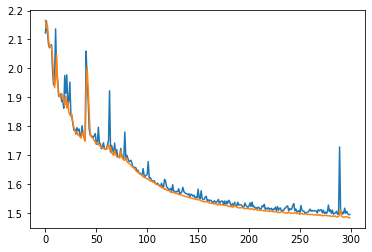

In [29]:
plt.plot(trainer.val_losses)
plt.plot(trainer.train_losses)

In [ ]:
#lstm3 : unreplicated dataset